In [1]:
# Make the csv
import pandas as pd

df = pd.DataFrame(columns=["path", "species", "embedding_path"])
df["species"] = ["human", "mouse"]
df["path"] = ["data/human.h5ad", "data/mouse.h5ad"]

##### CHANGE THESE PATHS #####
human_embedding_path = "/restricted/projectnb/czproj/A00/jlhan/saturn/data/protein_embeddings_export/ESM2/human_embedding.torch"
mouse_embedding_path = "/restricted/projectnb/czproj/A00/jlhan/saturn/data/protein_embeddings_export/ESM2/mouse_embedding.torch"
##############################
df["embedding_path"] = [human_embedding_path, mouse_embedding_path]
df.to_csv("data/human_mouse_run.csv", index=False)
df

,path,species,embedding_path
0,data/human.h5ad,human,/restricted/projectnb/czproj/A00/jlhan/saturn/...
1,data/mouse.h5ad,mouse,/restricted/projectnb/czproj/A00/jlhan/saturn/...


In [4]:
pd.read_csv("data/human_mouse_cell_type_map.csv")

,Unnamed: 0,human_cell_type,mouse_cell_type
0,0,Ast,Astrocytes
1,1,CAMs,NaN
2,2,End,Endothelial_cells
3,3,Exc,Excitatory_neurons
4,4,Fib,Fibroblasts
5,5,Inh,Inhibitary_neurons
6,6,Mic,Microglia
7,7,OPC,OPCs
8,8,Oli,Oligodendrocytes
9,9,Per,Pericytes


In [1]:
import scanpy as sc
import pickle

/restricted/projectnb/czproj/A00/jlhan/packages/saturn/lib/python3.10/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [2]:
adata = sc.read("saturn_results/test256_data_human_mouse_org_saturn_seed_0.h5ad")
adata

AnnData object with n_obs × n_vars = 38975 × 256
    obs: 'labels', 'labels2', 'ref_labels', 'species'
    obsm: 'macrogenes'

In [3]:
sc.pp.pca(adata)

In [6]:
adata.obs["ref_labels"].unique()

['Ast', 'Exc', 'Mic', 'CAMs', 'T cells', ..., 'Pericytes', 'Endothelial_cells', 'Fibroblasts', 'COPs', 'Dentate_gyrus_granule_cells']
Length: 25
Categories (25, object): ['Ast', 'Astrocytes', 'CAMs', 'COPs', ..., 'Per', 'Pericytes', 'SMC', 'T cells']

In [7]:
adata.obs["ref_labels"] = adata.obs["ref_labels"].replace({
    "Ast": "Astrocytes",
    "End": "Endothelial_cells",
    "Exc": "Excitatory_neurons",
    "Fib": "Fibroblasts",
    "Inh": "Inhibitary_neurons",
    "Mic": "Microglia",
    "OPC": "OPCs",
    "Oli": "Oligodendrocytes",
    "Per": "Pericytes"
})

/scratch/351202.1.ood/ipykernel_3751566/1056973171.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs["ref_labels"] = adata.obs["ref_labels"].replace({


In [8]:
adata.obs["ref_labels"].unique()

['Astrocytes', 'Excitatory_neurons', 'Microglia', 'CAMs', 'T cells', ..., 'SMC', 'CPEC', 'Epd', 'COPs', 'Dentate_gyrus_granule_cells']
Length: 16
Categories (16, object): ['Astrocytes', 'CAMs', 'COPs', 'CPEC', ..., 'Oligodendrocytes', 'Pericytes', 'SMC', 'T cells']

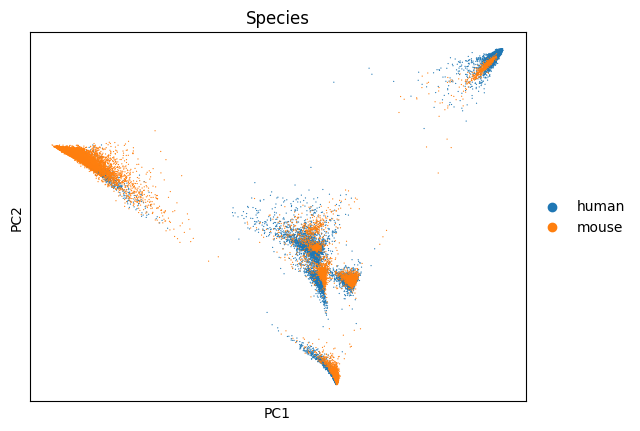

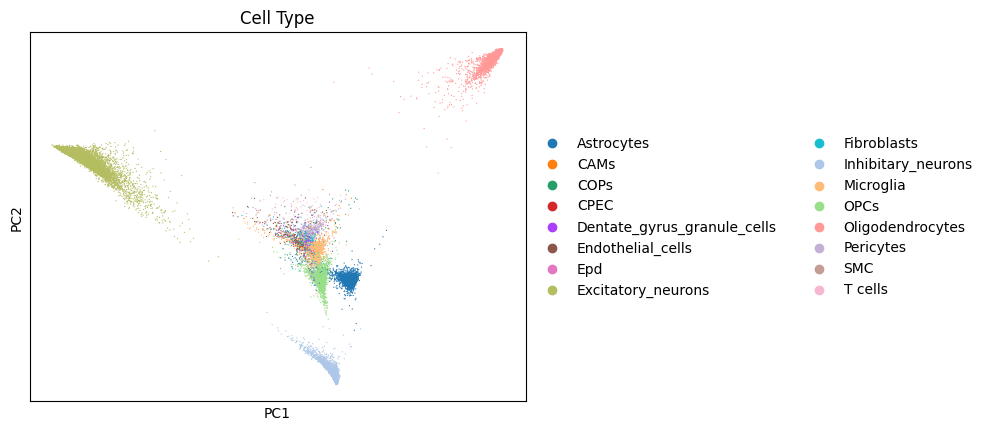

In [10]:
sc.pl.pca(adata, color="species", title="Species")
sc.pl.pca(adata, color="ref_labels", title="Cell Type") # The original cell type names

In [13]:
import matplotlib.pyplot as plt

In [11]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/restricted/projectnb/czproj/A00/jlhan/packages/saturn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


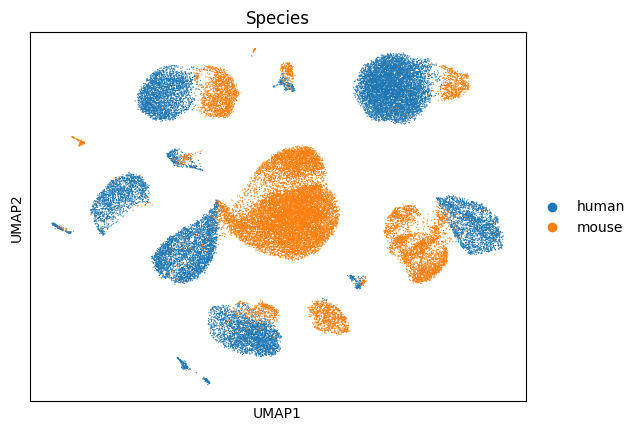

<Figure size 640x480 with 0 Axes>

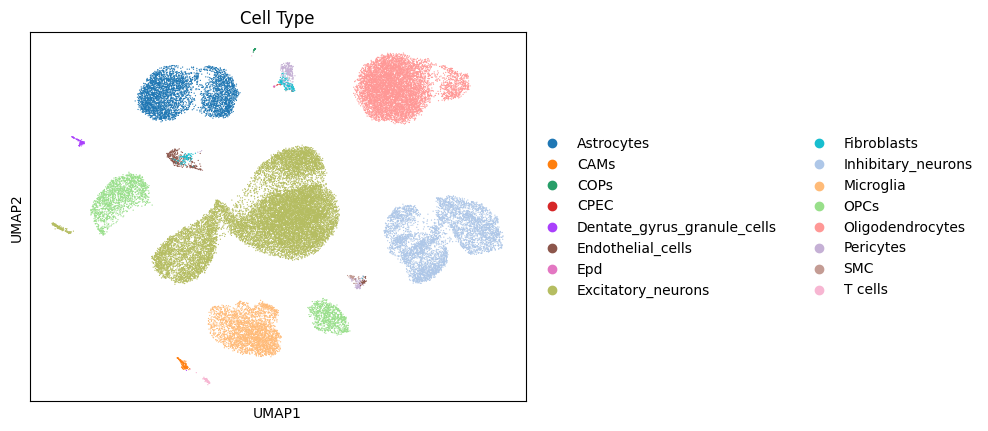

<Figure size 640x480 with 0 Axes>

In [16]:
sc.pl.umap(adata, color="species", title="Species", save="_species.png")

sc.pl.umap(adata, color="ref_labels", title="Cell Type", save="_ref_labels.png")

In [17]:
adata.obs

,labels,labels2,ref_labels,species
AAACGCTAGTGAACAT-1-1,human_Ast,Ast,Astrocytes,human
AAAGGATAGGATATGT-1-1,human_Ast,Ast,Astrocytes,human
AAAGGGCCAGGCATGA-1-1,human_Ast,Ast,Astrocytes,human
AAAGGGCGTATTCTCT-1-1,human_Ast,Ast,Astrocytes,human
AAAGTCCAGCTGCGAA-1-1,human_Ast,Ast,Astrocytes,human
...,...,...,...,...
TTTGTCATCCAAATGC-1_7,mouse_Astrocytes,Astrocytes,Astrocytes,mouse
TTTGTCATCCGTCAAA-1_7,mouse_Oligodendrocytes,Oligodendrocytes,Oligodendrocytes,mouse
TTTGTCATCTAACTTC-1_7,mouse_Excitatory_neurons,neurons,Excitatory_neurons,mouse
TTTGTCATCTCCCTGA-1_7,mouse_Excitatory_neurons,neurons,Excitatory_neurons,mouse


In [18]:
adata.write("saturn_results/human_mouse.h5ad")